# External Libraries

In [1]:
# Standard library
import inspect
from collections import OrderedDict as ODict
from typing import NamedTuple

In [2]:
# Third-party libraries
import matplotlib.pyplot as plt
import numpy as np
from rich.console import Console
from rich.traceback import install

In [3]:
# --- RANDOM GENERATOR SETUP --- #
SEED = 42
RNG = np.random.default_rng(SEED)

# --- TERMINAL OUTPUT SETUP --- #
install(show_locals=False)
console = Console()


## NumPy RNG Distributions

In [4]:
distributions = {}
for dist in dir(RNG):
    if not dist.startswith("_"):
        is_callable = callable(RNG.__getattribute__(dist))  # noqa: PLC2801
        if not is_callable:
            continue
        arguments = inspect.signature(
            RNG.__getattribute__(dist),
        ).parameters.keys()
        distributions[dist] = arguments
console.print(distributions)

{
    'beta': odict_keys(['a', 'b', 'size']),
    'binomial': odict_keys(['n', 'p', 'size']),
    'bytes': odict_keys(['length']),
    'chisquare': odict_keys(['df', 'size']),
    'choice': odict_keys(['a', 'size', 'replace', 'p', 'axis', 'shuffle']),
    'dirichlet': odict_keys(['alpha', 'size']),
    'exponential': odict_keys(['scale', 'size']),
    'f': odict_keys(['dfnum', 'dfden', 'size']),
    'gamma': odict_keys(['shape', 'scale', 'size']),
    'geometric': odict_keys(['p', 'size']),
    'gumbel': odict_keys(['loc', 'scale', 'size']),
    'hypergeometric': odict_keys(['ngood', 'nbad', 'nsample', 'size']),
    'integers': odict_keys(['low', 'high', 'size', 'dtype', 'endpoint']),
    'laplace': odict_keys(['loc', 'scale', 'size']),
    'logistic': odict_keys(['loc', 'scale', 'size']),
    'lognormal': odict_keys(['mean', 'sigma', 'size']),
    'logseries': odict_keys(['p', 'size']),
    'multinomial': odict_keys(['n', 'pvals', 'size']),
    'multivariate_hypergeometric': odict_keys(['colors', 'nsample', 'size', 'method']),
    'multivariate_normal': odict_keys(['mean', 'cov', 'size', 'check_valid', 'tol', 'method']),
    'negative_binomial': odict_keys(['n', 'p', 'size']),
    'noncentral_chisquare': odict_keys(['df', 'nonc', 'size']),
    'noncentral_f': odict_keys(['dfnum', 'dfden', 'nonc', 'size']),
    'normal': odict_keys(['loc', 'scale', 'size']),
    'pareto': odict_keys(['a', 'size']),
    'permutation': odict_keys(['x', 'axis']),
    'permuted': odict_keys(['x', 'axis', 'out']),
    'poisson': odict_keys(['lam', 'size']),
    'power': odict_keys(['a', 'size']),
    'random': odict_keys(['size', 'dtype', 'out']),
    'rayleigh': odict_keys(['scale', 'size']),
    'shuffle': odict_keys(['x', 'axis']),
    'spawn': odict_keys(['n_children']),
    'standard_cauchy': odict_keys(['size']),
    'standard_exponential': odict_keys(['size', 'dtype', 'method', 'out']),
    'standard_gamma': odict_keys(['shape', 'size', 'dtype', 'out']),
    'standard_normal': odict_keys(['size', 'dtype', 'out']),
    'standard_t': odict_keys(['df', 'size']),
    'triangular': odict_keys(['left', 'mode', 'right', 'size']),
    'uniform': odict_keys(['low', 'high', 'size']),
    'vonmises': odict_keys(['mu', 'kappa', 'size']),
    'wald': odict_keys(['mean', 'scale', 'size']),
    'weibull': odict_keys(['a', 'size']),
    'zipf': odict_keys(['a', 'size'])
}

In [5]:
sensible_params = {
    "beta": ODict(a=2.0, b=5.0, size=100000),
    "binomial": ODict(n=10, p=0.5, size=100000),
    "bytes": ODict(length=16),
    "chisquare": ODict(df=4, size=100000),
    "choice": ODict(
        a=[1, 2, 3, 4, 5],
        size=100000,
        replace=True,
        p=None,
        axis=0,
        shuffle=False,
    ),
    "dirichlet": ODict(alpha=[0.5, 0.5, 0.5], size=100000),
    "exponential": ODict(scale=1.0, size=100000),
    "f": ODict(dfnum=5, dfden=2, size=100000),
    "gamma": ODict(shape=2.0, scale=2.0, size=100000),
    "geometric": ODict(p=0.3, size=100000),
    "gumbel": ODict(loc=0.0, scale=1.0, size=100000),
    "hypergeometric": ODict(ngood=25, nbad=75, nsample=20, size=100000),
    "integers": ODict(low=0, high=10, size=100000, dtype=int, endpoint=False),
    "laplace": ODict(loc=0.0, scale=1.0, size=100000),
    "logistic": ODict(loc=0.0, scale=1.0, size=100000),
    "lognormal": ODict(mean=0.0, sigma=1.0, size=100000),
    "logseries": ODict(p=0.8, size=100000),
    "multinomial": ODict(n=10, pvals=[0.2, 0.3, 0.5], size=100000),
    "multivariate_hypergeometric": ODict(
        colors=[10, 20, 30],
        nsample=10,
        size=100000,
        method="count",
    ),
    "multivariate_normal": ODict(
        mean=[0.0, 0.0],
        cov=[[1.0, 0.5], [0.5, 1.0]],
        size=100000,
        check_valid="ignore",
        tol=1e-8,
        method="cholesky",
    ),
    "negative_binomial": ODict(n=10, p=0.5, size=100000),
    "noncentral_chisquare": ODict(df=3, nonc=2.0, size=100000),
    "noncentral_f": ODict(dfnum=5, dfden=2, nonc=2.0, size=100000),
    "normal": ODict(loc=0.0, scale=1.0, size=100000),
    "pareto": ODict(a=3.0, size=100000),
    "permutation": ODict(x=[1, 2, 3, 4, 5], axis=0),
    "permuted": ODict(x=[1, 2, 3, 4, 5], axis=0, out=None),
    "poisson": ODict(lam=4.0, size=100000),
    "power": ODict(a=5.0, size=100000),
    "random": ODict(size=100000, dtype=float, out=None),
    "rayleigh": ODict(scale=1.0, size=100000),
    "shuffle": ODict(x=[1, 2, 3, 4, 5], axis=0),
    "spawn": ODict(n_children=2),
    "standard_cauchy": ODict(size=100000),
    "standard_exponential": ODict(
        size=100000,
        dtype=float,
        method="zig",
        out=None,
    ),
    "standard_gamma": ODict(shape=2.0, size=100000, dtype=float, out=None),
    "standard_normal": ODict(size=100000, dtype=float, out=None),
    "standard_t": ODict(df=10, size=100000),
    "triangular": ODict(left=0.0, mode=0.5, right=1.0, size=100000),
    "uniform": ODict(low=0.0, high=1.0, size=100000),
    "vonmises": ODict(mu=0.0, kappa=1.0, size=100000),
    "wald": ODict(mean=1.0, scale=1.0, size=100000),
    "weibull": ODict(a=1.5, size=100000),
    "zipf": ODict(a=2.0, size=100000),
}

In [6]:
# Pass arguments to check if there are errors
dist_names = []
samples = []
for dist, params in sensible_params.items():
    try:
        sample = RNG.__getattribute__(dist)(**params)
        dist_names.append(dist)
        samples.append(sample)
    except Exception as e:
        console.print(f"[red]Error in {dist} with params {params}: {e}[/red]")

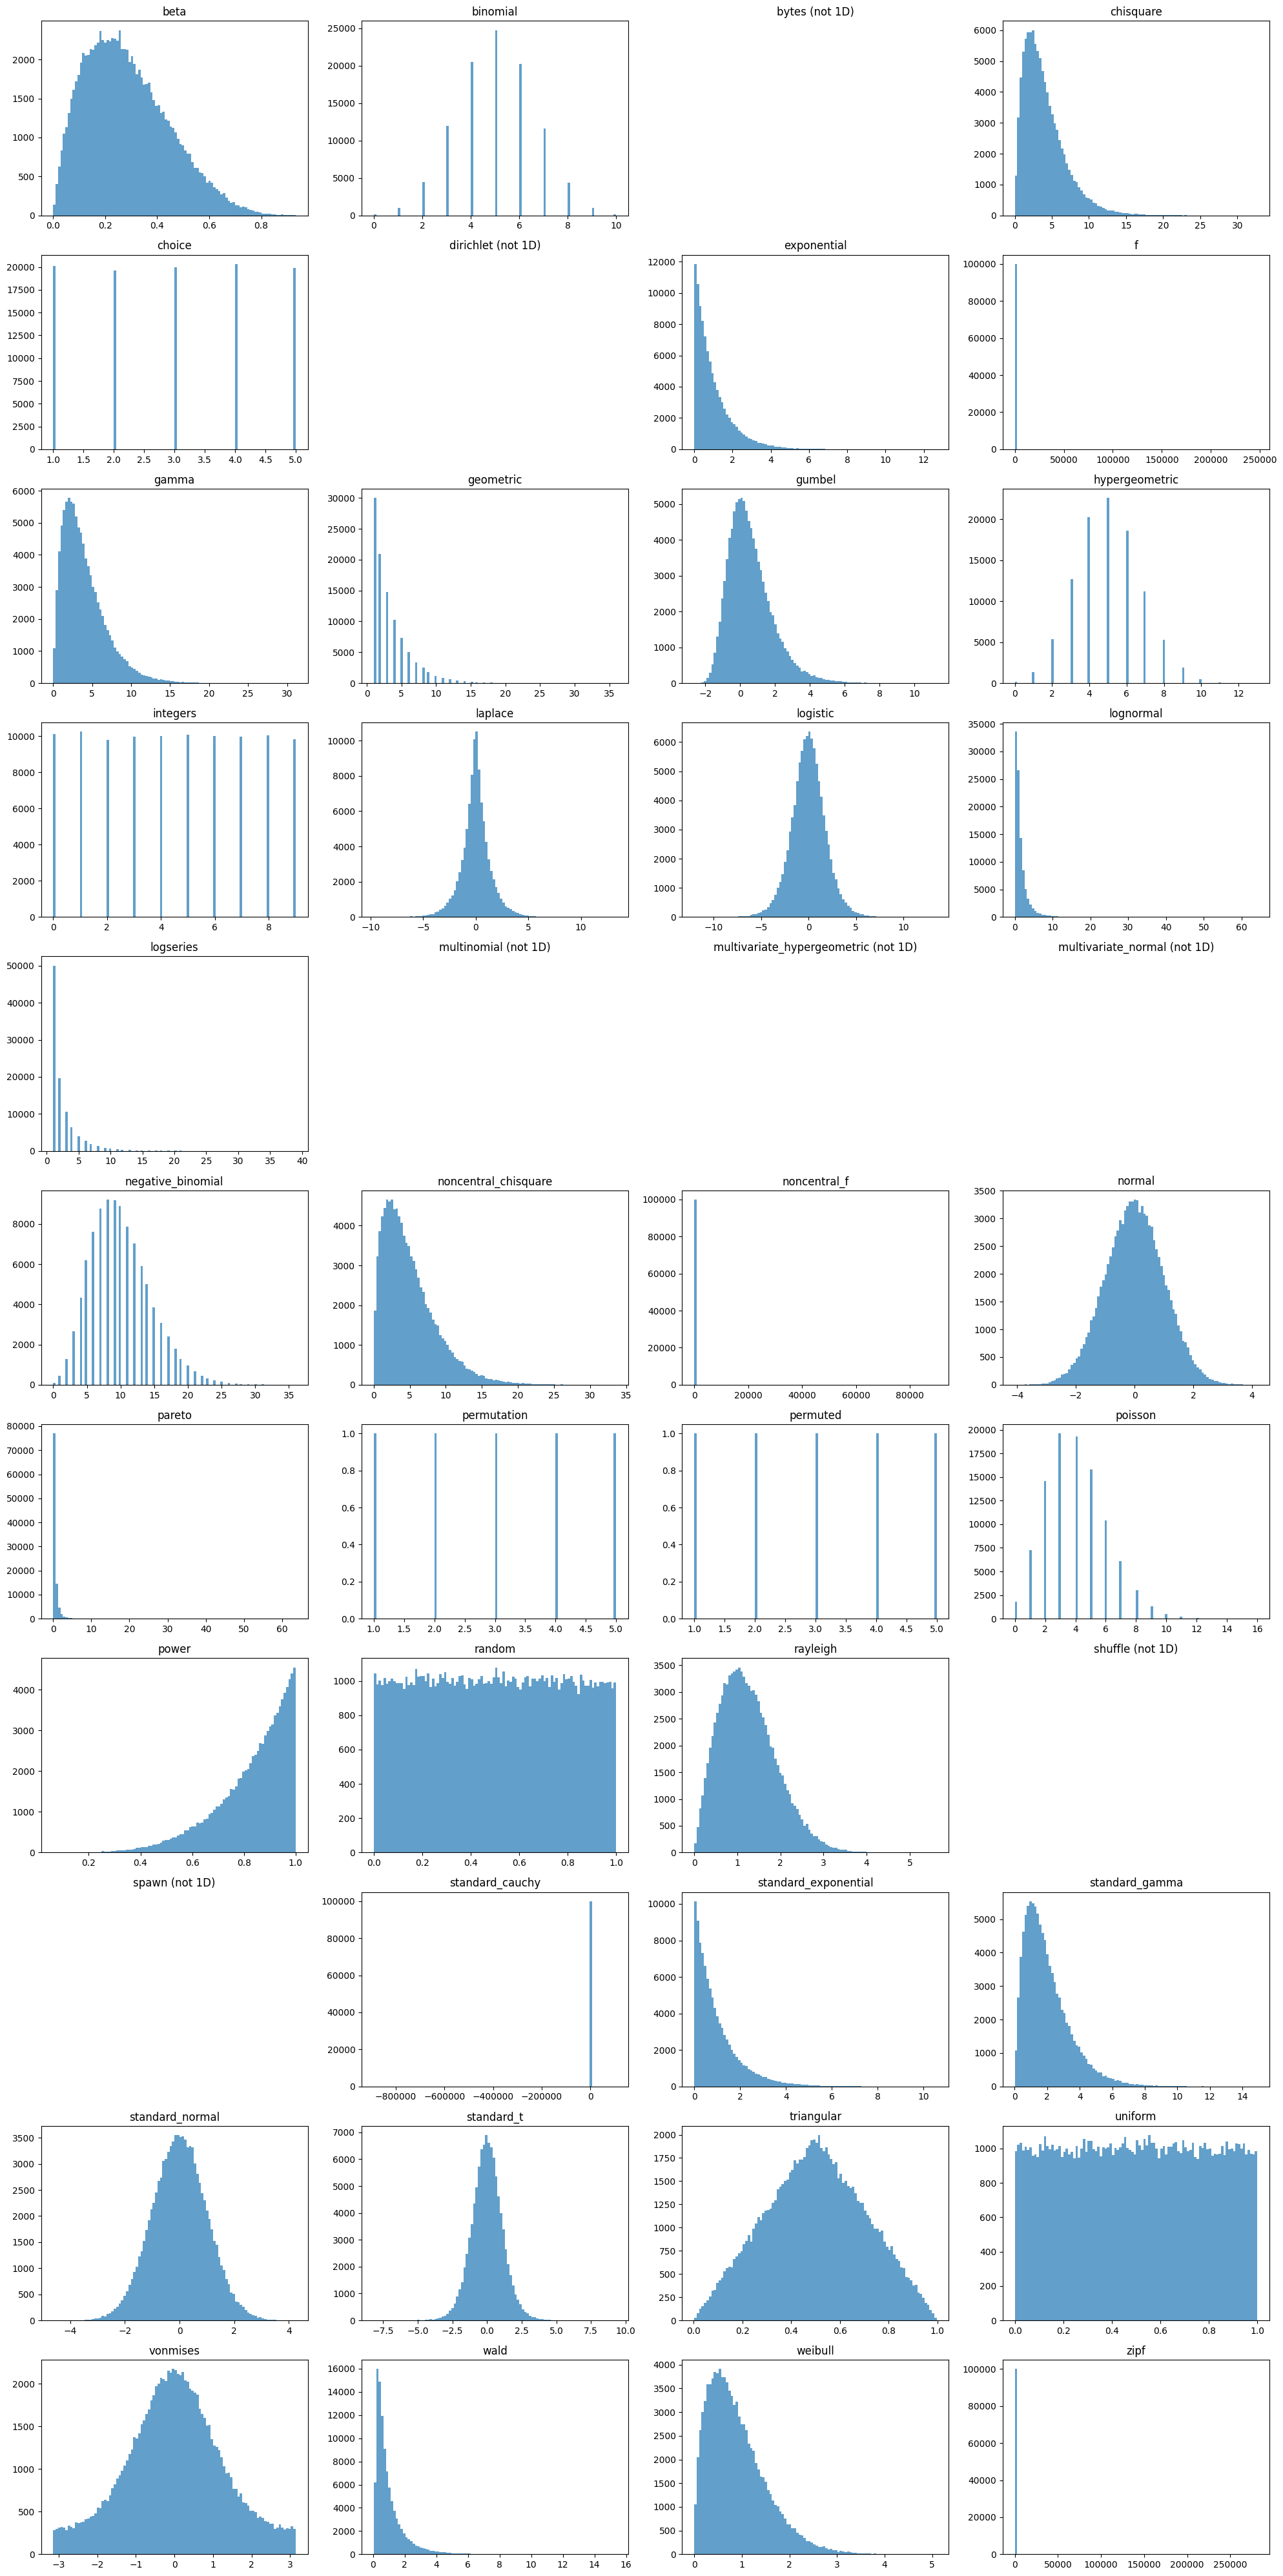

In [7]:
# Visualize all distributions that are 1D numpy arrays
nrows = len(dist_names) // 4 + (len(dist_names) % 4 > 0)
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(20, 40))
axes = axes.flatten()

for i, (name, data) in enumerate(zip(dist_names, samples, strict=False)):
    if isinstance(data, np.ndarray) and data.ndim == 1:
        axes[i].hist(data, bins=100, alpha=0.7)
        axes[i].set_title(name)
    else:
        axes[i].axis("off")
        axes[i].set_title(f"{name} (not 1D)")

plt.tight_layout()
plt.show()

### Rescaled Beta Distribution

In [8]:
def scaled_beta(
    a: float,
    b: float,
    size: int | list[int],
    c: float = 0,
    d: float = 1,
    *,
    negative_reflect: bool = True,
):
    # a & b must be grater than 0
    lower = min(c, d)
    upper = max(c, d)

    # If negative_reflect is True, c and d must be >= 0
    if negative_reflect and (c < 0 or d < 0):
        msg = "c and d must be non-negative when negative_reflect is True"
        raise ValueError(msg)

    # Generate samples from the scaled beta distribution
    sample = lower + (upper - lower) * RNG.beta(a=a, b=b, size=size)

    # Reflect some values to negative if specified
    if negative_reflect:
        reflection_mask = RNG.choice([-1, 1], size=size)
        return sample * reflection_mask
    return sample

In [9]:
# Pass arguments to check if there are errors
params = []
samples = []
factor = 3
space = 10
min_val = 0.1
max_val = 5.0
size = 100_000
for i in range(1, space * factor):
    j1 = i / factor
    j2 = (i - (i / 2)) / factor

    params_new = (j1, j2, size, min_val, max_val)
    params.append(params_new)
    sample = scaled_beta(*params_new)
    samples.append(sample)

    params_new = (j1, j1, size, min_val, max_val)
    params.append(params_new)
    sample = scaled_beta(*params_new)
    samples.append(sample)

    params_new = (j2, j1, size, min_val, max_val)
    params.append(params_new)
    sample = scaled_beta(*params_new)
    samples.append(sample)

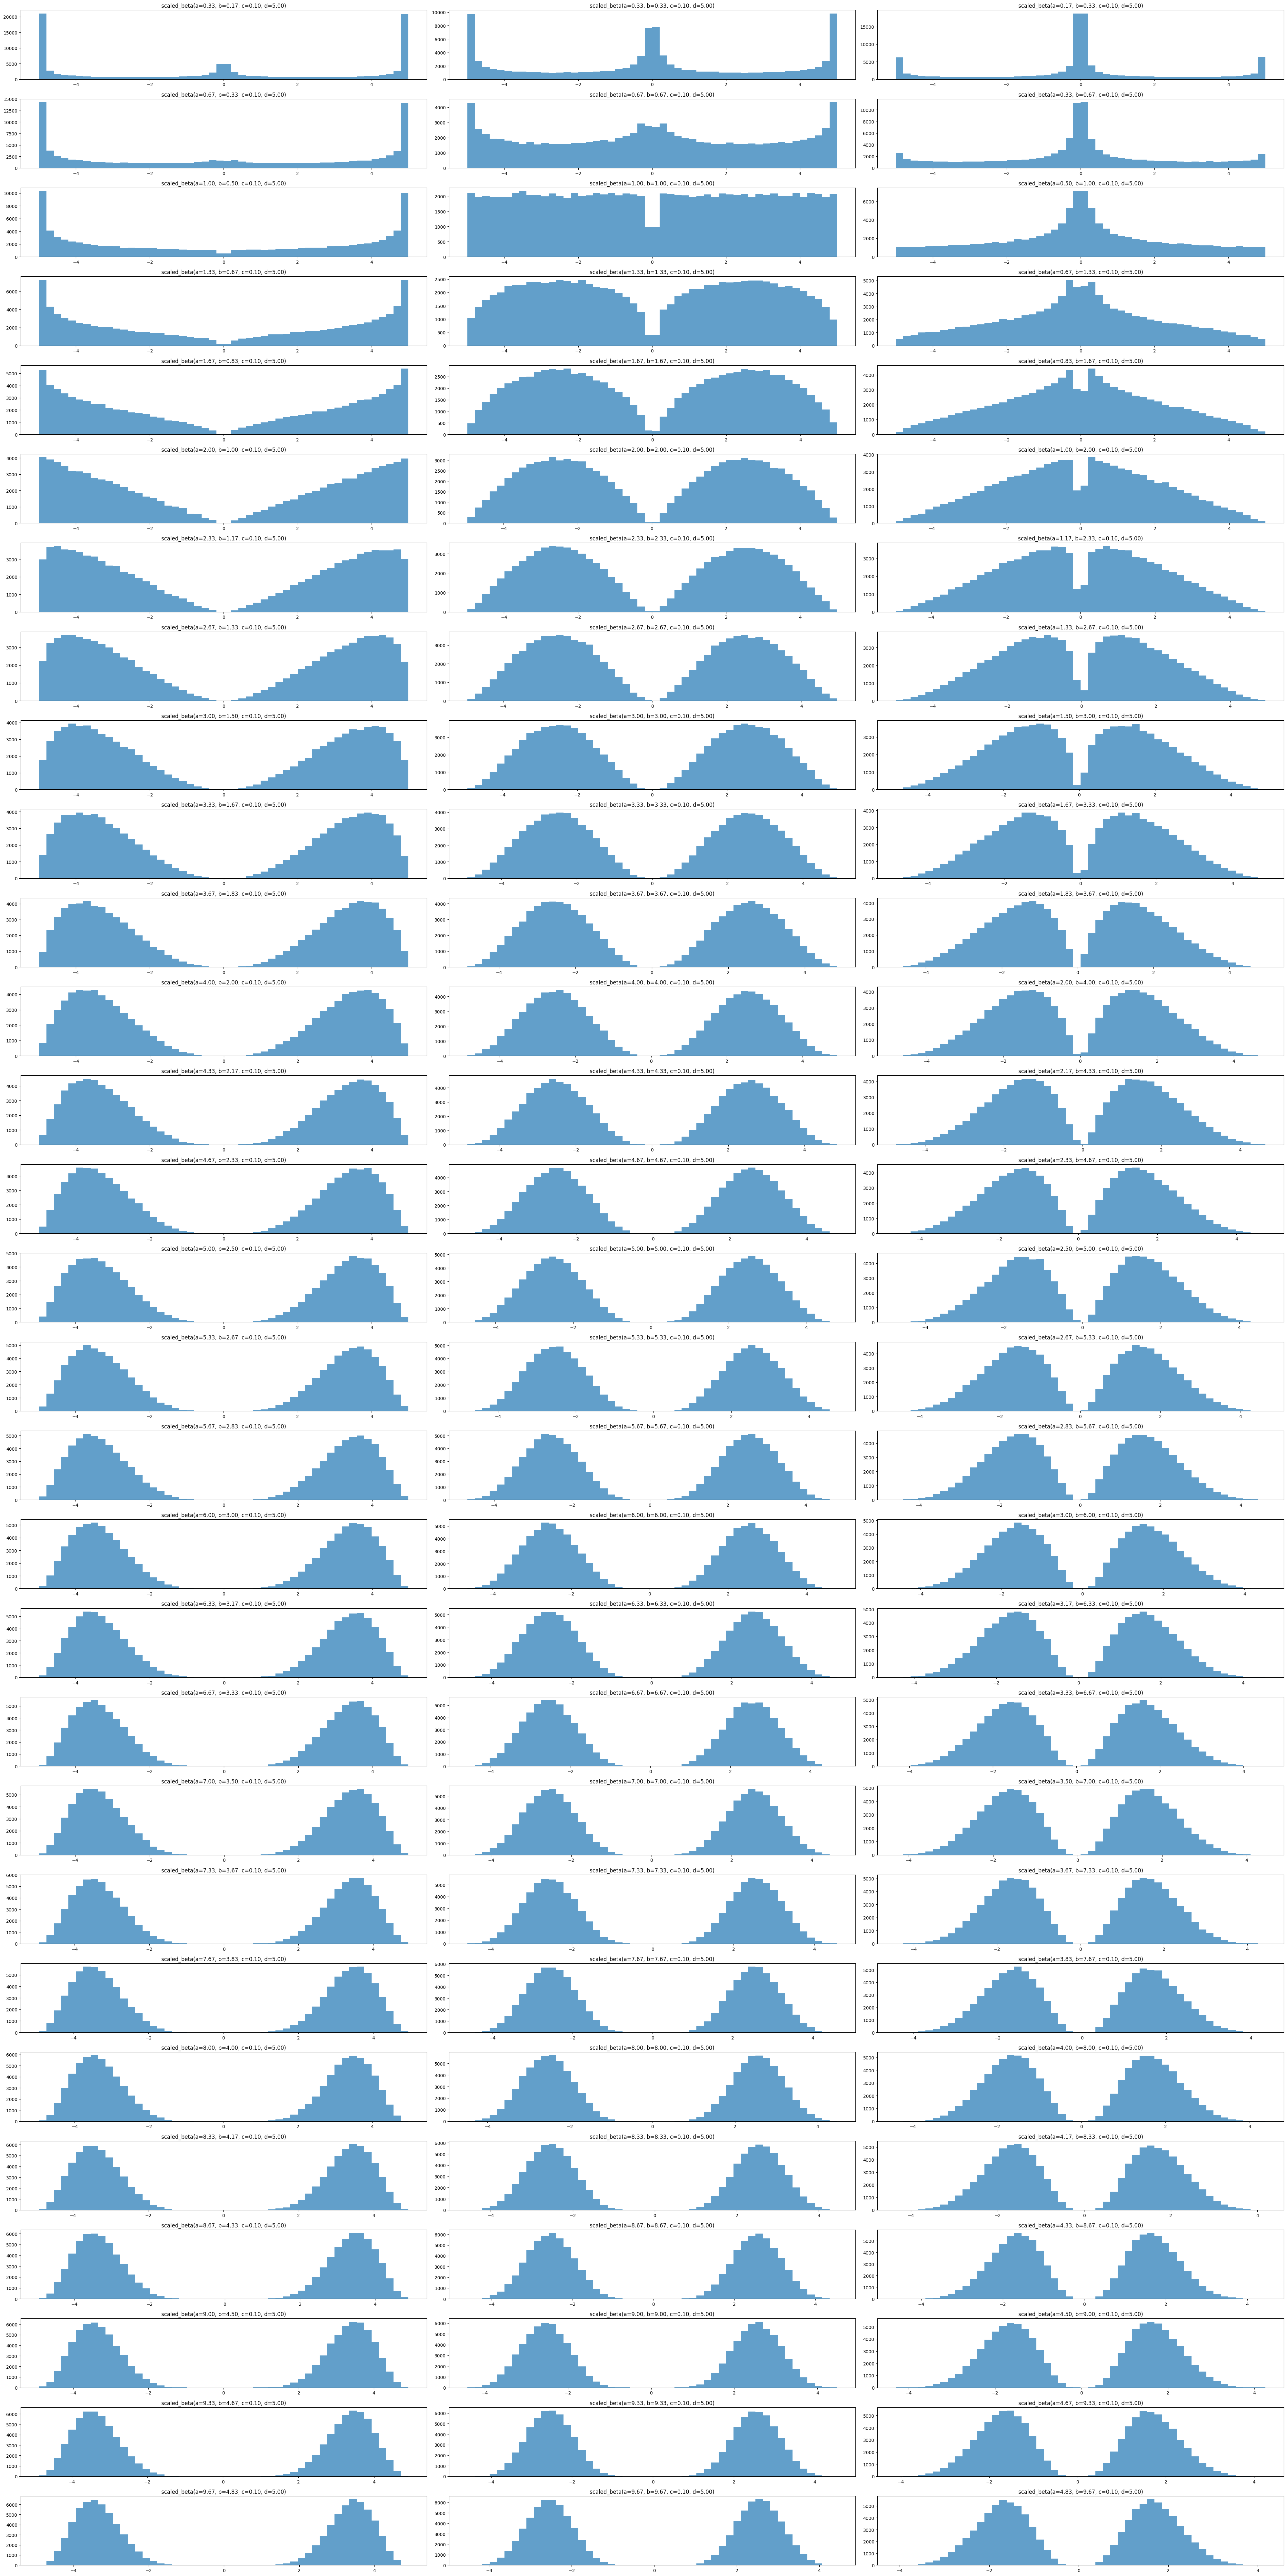

In [10]:
# Visualize all distributions that are 1D numpy arrays
ncols = 3
nrows = len(params) // ncols + (len(params) % ncols > 0)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(40, 80))
axes = axes.flatten()

for i, (param_set, data) in enumerate(zip(params, samples, strict=False)):
    a, b, _, c, d = param_set
    axes[i].hist(data, bins=50, alpha=0.7)
    axes[i].set_title(
        f"scaled_beta(a={a:.2f}, b={b:.2f}, c={c:.2f}, d={d:.2f})",
    )

plt.tight_layout()
plt.show()

### Beta Distribution of NA CPG

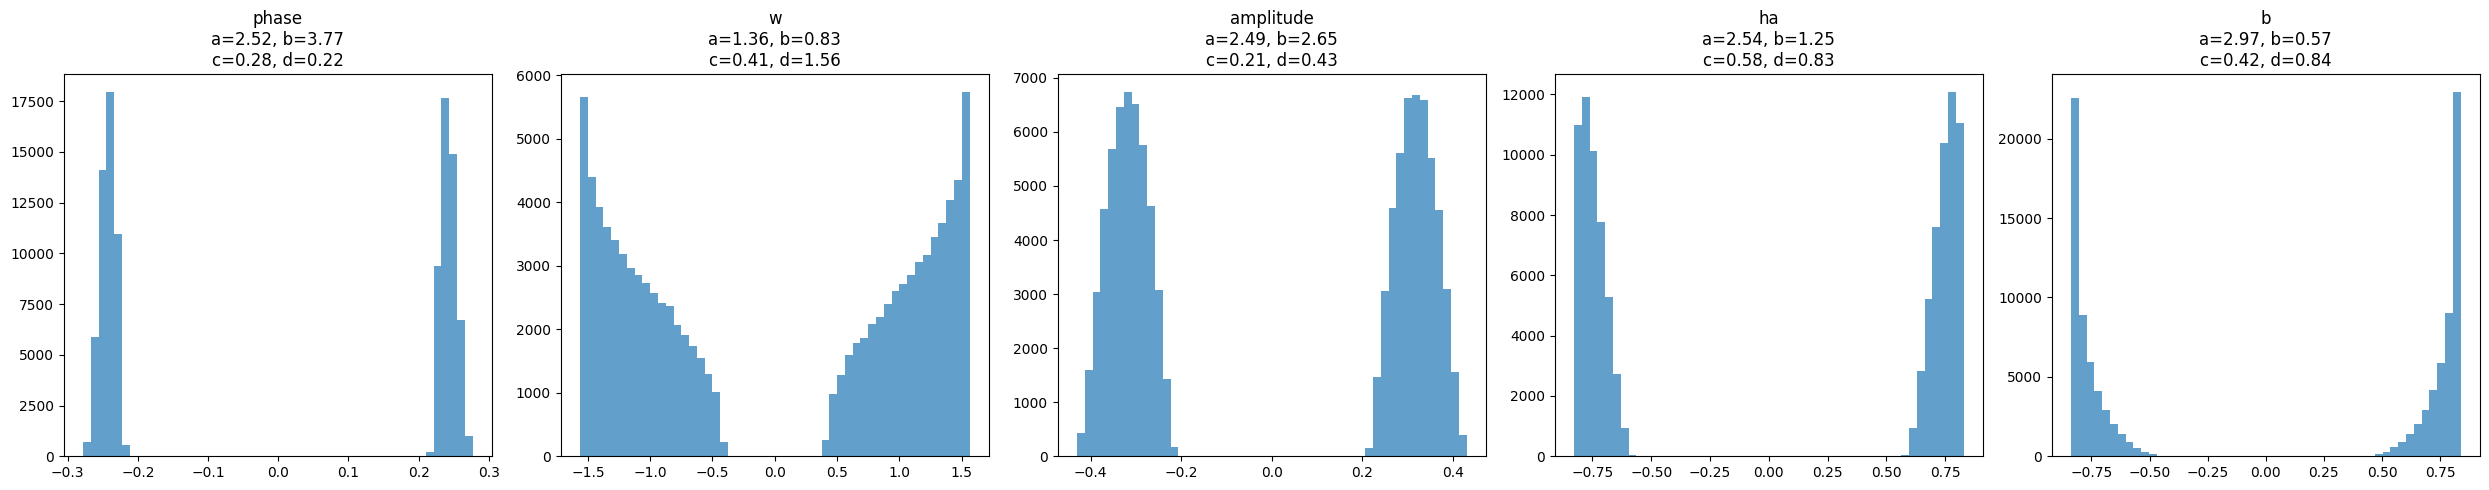

In [11]:
class BetaParams(NamedTuple):
    a: float
    b: float
    c: float
    d: float


phase_params = BetaParams(
    a=2.52254,
    b=3.76542,
    c=0.27862,
    d=0.21873,
)
w_params = BetaParams(
    a=1.35759,
    b=0.83381,
    c=0.41179,
    d=1.56244,
)
amplitude_params = BetaParams(
    a=2.486,
    b=2.64884,
    c=0.21248,
    d=0.4319,
)
ha_params = BetaParams(
    a=2.53736,
    b=1.25011,
    c=0.58488,
    d=0.82824,
)
b_params = BetaParams(
    a=2.9718,
    b=0.56805,
    c=0.4243,
    d=0.83754,
)

params_list = [
    ("phase", phase_params),
    ("w", w_params),
    ("amplitude", amplitude_params),
    ("ha", ha_params),
    ("b", b_params),
]
size = 100_000
samples = []
for _, p in params_list:
    samples.append(scaled_beta(p.a, p.b, size, p.c, p.d))

fig, axes = plt.subplots(nrows=1, ncols=len(params_list), figsize=(25, 5))
for ax, (name, p), data in zip(axes, params_list, samples, strict=False):
    ax.hist(data, bins=50, alpha=0.7)
    ax.set_title(f"{name}\na={p.a:.2f}, b={p.b:.2f}\nc={p.c:.2f}, d={p.d:.2f}")
plt.tight_layout()
plt.show()